# Face Recognition

I will try to code this site face recognition.  
http://www.mathgram.xyz/entry/chainer/bake/part0

## Download video from youtube
Download video form youtube by using pytube at python console.  
It's very easy way.

In [1]:
>>> from pytube import YouTube
>>> YouTube('https://www.youtube.com/watch?v=BbfWKXILbHs').streams.first().download()

## Get images for creating model

In [2]:
# -*- coding: utf-8 -*-
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

cascade_path = '/Users/yoheitaonishi/.pyenv/versions/anaconda3-5.0.0/share/OpenCV/lbpcascades/lbpcascade_animeface.xml'

In [3]:
'''
Method for gray scale, equalize and face recognition
'''
def detectFace(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_gray = cv2.equalizeHist(image_gray)
    
    cascade = cv2.CascadeClassifier(cascade_path)
    facerect = cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=3, minSize=(50, 50))
    return facerect

'''
Get images from video
'''
video_path = '/Users/yoheitaonishi/DeepLearning/face_recognition/monogatari_op.mp4'
cap = cv2.VideoCapture(video_path)
framenum = 0
faceframenum = 0

while(cap.isOpened()):
    framenum += 1
    ret, image = cap.read()
    if not ret:
        break
    if framenum%50 == 0:
        facerect = detectFace(image)
        if len(facerect) == 0: continue
        for rect in facerect:
            croped = image[rect[1]:rect[1]+rect[3], rect[0]:rect[0]+rect[2]]
            cv2.imwrite('images/1_' + str(faceframenum) + '.jpg', croped)
            faceframenum += 1
cap.release()

## Display 10 sample images

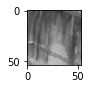

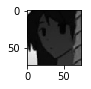

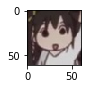

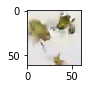

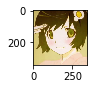

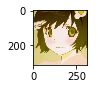

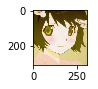

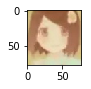

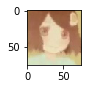

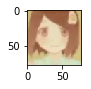

In [8]:
images = os.listdir('./images/')
image_number = 0
for image in images:
    if image == '.DS_Store': continue
    image_number += 1
    img = plt.imread('./images/' + image)
    plt.figure(figsize=(1,1))
    plt.imshow(img)
    if image_number == 10: break

## Increasing Face Image

In [ ]:
imgName = os.listdir( './images')

def readImg(imgName):
    try:

## TO DO
* Getting images from online videos. Perphaps I should use ffpmeg etc...